## Visualizaitn orientation used for powder average on SO3 surface


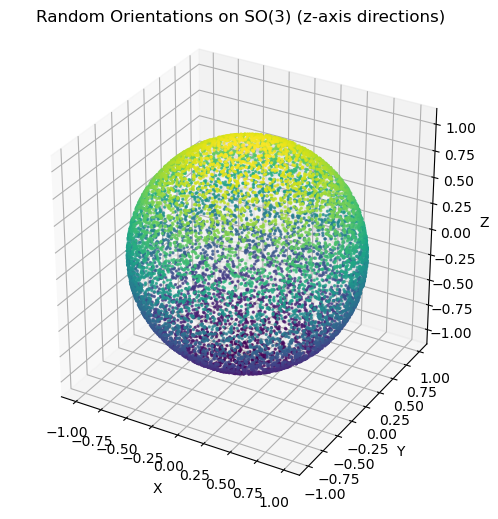

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Number of random rotations
N = 10000

# Sample random rotations from SO(3)
rot = R.random(num=N)

# Extract Euler angles (zyz convention)
alpha_vals, beta_vals, gamma_vals = rot.as_euler('zyz', degrees=False).T

# Extract rotation matrices
rot_mtx = rot.as_matrix()

# Take the third column (z-axis of each rotated frame)
z_axes = rot_mtx[:, :, 2]  # shape (N, 3)
x, y, z = z_axes[:, 0], z_axes[:, 1], z_axes[:, 2]

# --- Visualization ---
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the z-axis directions as points on the unit sphere
ax.scatter(x, y, z, s=2, c=z, cmap='viridis', alpha=0.7)

# Draw a reference sphere
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
ax.plot_wireframe(xs, ys, zs, color='gray', alpha=0.1)

ax.set_title("Random Orientations on SO(3) (z-axis directions)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1, 1, 1])

plt.show()
